# Machine Learning Supervisionada

### Explorando digitos escritos a mão: Identificar corretamente, pelas imagens, os números

In [1]:
%matplotlib inline

### Importando o arquivo da biblioteca de Scikit-Learn

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

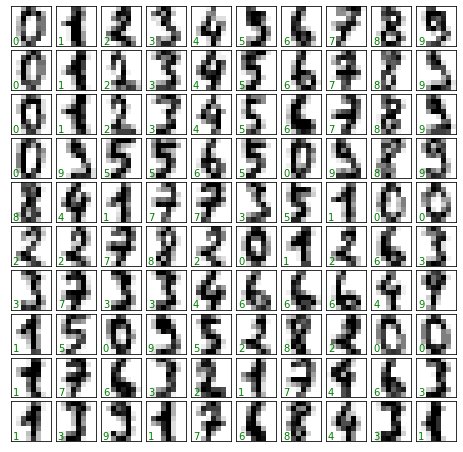

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
transform=ax.transAxes, color='green')

Para trabalhar com esses dados no Scikit-learn, é necessária uma representação bidimensional de tamanho ``[n_samples, n_features]``. 
Pode-se conseguir essa transformação tratando cada pixel da imagem como um recurso diferente: isto é, esticando cada imagem matriz para obter um array unidimensional com 64 pixels de comprimento representando cada dígito. 

Além disso, é necessário o vetor target, que fornece a tag determinada anteriormente para cada dígito. 
Estas duas quantidades estão incluídas no conjunto de dados de teste, sob os atributos ``data`` e ``target``, respectivamente:

In [9]:
X = digits.data
X.shape

(1797, 64)

In [10]:
y = digits.target
y.shape

(1797,)

### Aprendizagem não supervisionada: Redução da dimensionalidade 

Não é fácil visualizar os pontos no espaço de parâmetros de 64 dimensões (alta dimensionalidade). 
Para isso, é necessário reduzir as dimensões para duas, usando um método não supervisionado. 
Um dos algoritmos usados nesta redução é o *Isomap* (do conjunto de algoritmos conhecido como manifold learning):

In [11]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

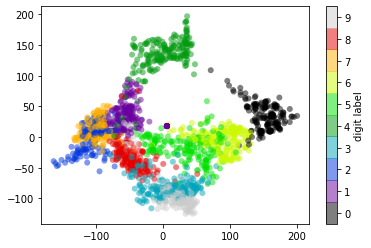

In [12]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Podemos ler deste resultado:
<br>
- números estão separados bem diversamente no espaço de parâmetro de 64 dimensões;
- os 0s (em preto) e os 1s (em roxo) têm muito pouca sobreposição no espaço de parâmetros. E faz sentido isso pois o 0 está vazio no centro da imagem, enquanto o 1 normalmente terá pixels escuros no centro. 
- há um espectro mais ou menos contínuo entre 1s e 4s: algumas pessoas desenham 1s com "chapéus pequenos", o que faz com que pareçam 4s. 
- os diferentes grupos parecem estar relativamente bem separados no espaço de parâmetros: isso diz que até mesmo um algoritmo de classificação muito simples poderia ser executado corretamente sobre esses dados.


### Algoritimo para classificação do conjunto de dados

__Modelo do tipo Naive Bayes Gausiano__

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

### Avaliando a precisão

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

### Matriz de confusão para verificar os acertos e os erros

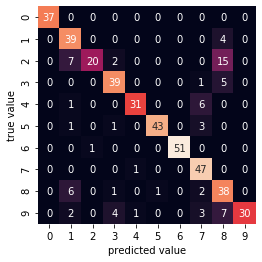

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Resultado: 
<br>
- Existem muitos 2 sendo identificados como 8 e 7;
- Existem muitos 8 sendo identificados como 1;
etc

### Plotando - Outra forma de verificar os acertos e os erros

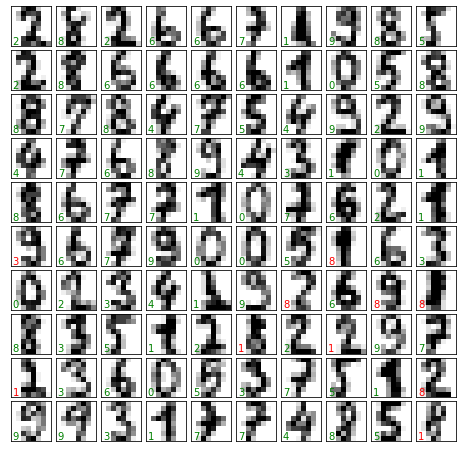

In [17]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
transform=ax.transAxes,color='green' if (ytest[i] == y_model[i]) else 'red')

# Para melhorar essa análise, pode-se usar modelos mais sofisticados, tais como Support Vector Machines, florestas aleatórias ou outras técnicas de classificação.